# Process 3B


In [108]:
#importing dependencies

import pandas as pd 
import numpy as np
from scipy import stats

#For plotting
import matplotlib.pyplot as plt
import seaborn as sns 


from scipy import stats

# for min_max scaling and normalization
from mlxtend.preprocessing import minmax_scaling
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing

In [109]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [110]:
#Yiwei
# path = '/content/drive/MyDrive/Classroom/DATA 6545: Data Science and MLOps SP2023/Wilson Alexei - Competition1_raw_data.xlsx'

#Jose
path = '/content/drive/MyDrive/Classroom/DATA 6545: Data Science and MLOps SP2023/Jose Echevarria - Competition1_raw_data.xlsx'


In [111]:
#Creating DF from path

df = pd.read_excel(path)

In [112]:
df.shape ## datasets have 682 rows and 22 columns

(682, 22)

In [113]:
df.head(10)

,I1,I2,I3,P(IPO),P(H),P(L),P(1Day),C1,C2,C3,...,C6,C7,T1,T2,T3,T4,T5,S1,S2,S3
0,AATI,ADVANCED ANALOGIC TECHNOLOGIES INC,3674,10,9.5,8.5,11.87,122,1,3.43,...,10600000,51.345,470,12719,11560,301,690,62,117,139
1,ABPI,ACCENTIA BIOPHARMACEUTICALS INC,2834,8,10,8,7.25,259,0,-1.62,...,2400000,25.936,791,21792,19585,510,1120,71,242,237
2,ACAD,ACADIA PHARMACEUTICALS INC,2834,7,14,12,6.7,90,1,-1.24,...,5000000,7.378,201,5262,4785,128,325,61,33,60
3,ACHN,ACHILLION PHARMACEUTICALS INC,2834,11.5,16,14,12.39,209,1,-0.91,...,4500000,8.526,328,8259,7574,177,509,80,59,110
4,ACLI,AMERICAN COMMERCIAL LINES INC.,4492,21,21,19,56.599998,80,1,0.07,...,8250000,632.298,572,14830,13176,336,720,67,149,167
5,ACOM,Ancestry.com Inc.,7379,13.5,14.5,12.5,14.2,94,1,0.06,...,7407407,197.591,510,17999,13934,328,815,62,96,181
6,ACOR,ACORDA THERAPEUTICS INC,2836,6,13,11,6.72,128,1,-1.87,...,5500000,5.146,495,15758,13953,379,698,82,106,135
7,ACRX,ACELRX PHARMACEUTICALS INC,2834,5,14,12,4.55,91,0,-0.74,...,8000000,-,334,11226,10056,276,-1,55,120,122
8,ACTV,ACTIVE NETWORK INC,7372,15,18,16,15.9,100,1,-0.51,...,11000000,279.6,620,14813,13463,335,917,58,124,234
9,ACW,ACCURIDE CORP,3714,9,19,17,0,106,1,1.49,...,11000000,494.008,385,9134,8107,198,459,81,90,147


In [114]:
#All coluumns are of type object

df.dtypes

I1         object
I2         object
I3         object
P(IPO)     object
P(H)       object
P(L)       object
P(1Day)    object
C1         object
C2         object
C3         object
C4         object
C5         object
C6         object
C7         object
T1         object
T2         object
T3         object
T4         object
T5         object
S1         object
S2         object
S3         object
dtype: object

*   As we read in the excel file, we see that all the data types are all objects so preprocessing data will be needed to do further analysis
*   We will convert them accordingly depending on the data dictionary. Continuous columns will be converted into integers/float and categorical columns may need to be converted into integers first and will be converted into a categorical/binary eventually 
*   This will also help us to spot null values in each column and impute themaccordingly as well

In [115]:
#All coluumns are of type object

manuf_codes = [3674,3714,3661,2000,3690,3743,3721,3663,3411,2673,3621,3640,2621,3670,\
               2300,3021,3281,3651,2741,3663,2711,2090,3315,3651,2741,3663,2711,2090,\
               3315,3651,3990,3911,2015,3140,2790,2590,3100,2200,3390,3672,3334,3646,\
               3629,3442,3312,3440,3663,2080,3669,3812,3728,3452,3711,2750,3171,3720,\
               2221,3341,2510]

serv_codes = [7379,2854,3845,7389,5047,3841,5812,7334,2869,7359,2844,5945,5961,8090,\
              5033,8351,8731,5661,5600,5641,5940,5810,7312,7311,100,2870,5141,7997,\
              3822,5731,3825,7361,7993,7830,7812,5331,7319,5500,3861,7819,5712,5150,\
              8051,8000,8071,3081,8711,8062,7350,3842,2800,8742,5074,3826,5065,5160,\
              5051,5010,2860,2821,8082,7941,5084,5411,5944,2890,7380,5149,5900,5531,\
              5960,3861,8060,7384,3851,8011,3823,5412,5499,5080,7310,2810,2875,7389,\
              5063,5400,7929,7514]

other_codes = [2834,4492,2836,7372,2835,3568,4512,2911,8099,4931,8221,3576,8200,1311,\
               3577,4941,7373,4412,1389,1381,7371,4822,4813,4832,4213,3561,1221,4899,\
               1400,6331,3572,6794,3511,3555,4731,7374,7375,3559,541990,7370,5632,3583,\
               1382,4400,4955,6153,6324,4911,4812,4581,7011,4833,3571,4700,3578,1731,\
               3531,3999,8322,4011,6794,3562,1446,1600,4922,4953]

Here are the 3 lists of SIC codes for their selected industries as we segment them into 3 main industries which are `Manufacturing`, `Service`, and `Others`. `Others` includes industries such as Life Sciences, Technology, Finance, and etc. We will create the extra features in the Feature Engineering section. 

# Preprocessing


## Converting Continuous Values to Float


In [116]:
## Creating a function to convert the continuous columns to float
def convert_to_float(df, col_names):
    for col in col_names:
        if col not in df.columns:
            print(f"{col} not found in DataFrame.")
        elif df[col].dtype == 'float64':
            print(f"{col} is already of type float.")
        else:
            df[col] = pd.to_numeric(df[col], errors='coerce') #default parameter is float64
    return df

In [117]:
## List of continuous columns
cols = ['S1','S2','S3','T1','T2','T3','T4','T5','P(IPO)','P(H)','P(L)',\
       'P(1Day)','C1','C2','C3','C4','C5','C6','C7']

In [118]:
## Converting to float
df = convert_to_float(df, cols)
df.dtypes

I1          object
I2          object
I3          object
P(IPO)     float64
P(H)       float64
P(L)       float64
P(1Day)    float64
C1         float64
C2         float64
C3         float64
C4         float64
C5         float64
C6         float64
C7         float64
T1         float64
T2         float64
T3         float64
T4         float64
T5         float64
S1         float64
S2         float64
S3         float64
dtype: object

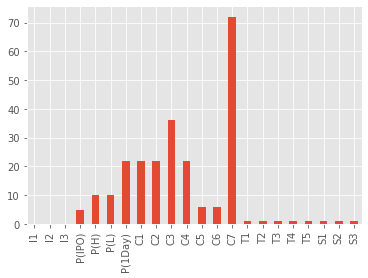

In [119]:
# Plotting null values in the columns
df.isna().sum().plot(kind='bar')

The bar graph above shows the sum of null values (`NaN`) for all the columns. As we can see, both continuous and categorical columns contain null values but we will use the `median` to `fillna()` the **continuous** columns and use the `mode` to `fillna()` the ***categorical*** columns

<ipython-input-120-6d1b35f6ff5d>:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.skew().plot(kind='bar')


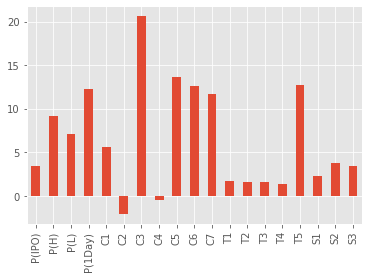

In [120]:
# Plotting the skewness of the columns
df.skew().plot(kind='bar')

In [121]:
# Checking ratio of null values in the columns 
print(df.isna().mean().round(4)*100)

I1          0.00
I2          0.00
I3          0.00
P(IPO)      0.73
P(H)        1.47
P(L)        1.47
P(1Day)     3.23
C1          3.23
C2          3.23
C3          5.28
C4          3.23
C5          0.88
C6          0.88
C7         10.56
T1          0.15
T2          0.15
T3          0.15
T4          0.15
T5          0.15
S1          0.15
S2          0.15
S3          0.15
dtype: float64


## Dropping 22 Companies with Null P(1Day)

After further research on the null values on the `P(1Day)`, we realized that there are 22 IPO companies who did NOT have First Day Trading Price so we decided to drop the 22 IPO companies as we assume that there may be some delays due to either regulatory issues, market conditions against their favors, or company-specific issues. 

In [122]:
## Companies with Null `P(1Day)`
df[df['P(1Day)'].isna()==True]

,I1,I2,I3,P(IPO),P(H),P(L),P(1Day),C1,C2,C3,...,C6,C7,T1,T2,T3,T4,T5,S1,S2,S3
10,ADKU,"ADCARE HEALTH SYSTEMS, INC",-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,332.0,7534.0,6747.0,169.0,263.0,51.0,65.0,74.0
86,BLT,BLOUNT INTERNATIONAL INC,-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,538.0,12732.0,11126.0,301.0,631.0,94.0,172.0,116.0
115,CELM,"CHINA ELECTRIC MOTOR, INC.",3621,4.50,6.5,5.50,NaN,NaN,NaN,NaN,...,5000000.0,NaN,351.0,10352.0,9296.0,235.0,482.0,52.0,124.0,120.0
123,CIL,"China Intelligent Lighting & Electronics, Inc.",3640,3.00,5.0,4.00,NaN,NaN,NaN,59.261,...,3350000.0,59.261,406.0,12065.0,11056.0,282.0,667.0,72.0,169.0,182.0
203,ELMD,"Electromed, Inc.",3845,4.00,6.0,4.00,NaN,NaN,NaN,12.999,...,1700000.0,12.999,224.0,6146.0,5551.0,154.0,386.0,29.0,52.0,140.0
215,ESEA,EUROSEAS LTD.,4412,7.00,NaN,NaN,NaN,NaN,NaN,NaN,...,9602340.0,NaN,521.0,12812.0,11190.0,285.0,545.0,72.0,60.0,121.0
217,EURX,EURAND N.V.,2834,16.00,19.0,17.00,NaN,NaN,NaN,109.336,...,7000000.0,109.336,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
268,GSL,GLOBAL SIGNAL INC,-,18.00,NaN,NaN,NaN,NaN,NaN,NaN,...,7000000.0,NaN,631.0,19479.0,17409.0,451.0,976.0,71.0,252.0,155.0
286,HPJ,"Highpower International, Inc.",3690,3.25,4.0,3.00,NaN,NaN,NaN,73.262,...,525000.0,73.262,377.0,10731.0,9703.0,240.0,486.0,45.0,104.0,96.0
330,KFI,KKR Financial Holdings LLC,-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,246.0,527.0,9046.0,355.0,10277.0,64.0,48.0,123.0


These 22 IPO Companies are missing the First Day Trading Price `P(1Day)` so we decided to drop these companies

In [123]:
droppable_ipo = df[df['P(1Day)'].isna()==True].index
droppable_ipo

Int64Index([ 10,  86, 115, 123, 203, 215, 217, 268, 286, 330, 357, 400, 401,
            410, 490, 496, 503, 560, 597, 614, 615, 675],
           dtype='int64')

In [124]:
df = df.drop(droppable_ipo, axis=0)
df

,I1,I2,I3,P(IPO),P(H),P(L),P(1Day),C1,C2,C3,...,C6,C7,T1,T2,T3,T4,T5,S1,S2,S3
0,AATI,ADVANCED ANALOGIC TECHNOLOGIES INC,3674,10.0,9.5,8.5,11.870000,122.0,1.0,3.43,...,10600000.0,51.345,470.0,12719.0,11560.0,301.0,690.0,62.0,117.0,139.0
1,ABPI,ACCENTIA BIOPHARMACEUTICALS INC,2834,8.0,10.0,8.0,7.250000,259.0,0.0,-1.62,...,2400000.0,25.936,791.0,21792.0,19585.0,510.0,1120.0,71.0,242.0,237.0
2,ACAD,ACADIA PHARMACEUTICALS INC,2834,7.0,14.0,12.0,6.700000,90.0,1.0,-1.24,...,5000000.0,7.378,201.0,5262.0,4785.0,128.0,325.0,61.0,33.0,60.0
3,ACHN,ACHILLION PHARMACEUTICALS INC,2834,11.5,16.0,14.0,12.390000,209.0,1.0,-0.91,...,4500000.0,8.526,328.0,8259.0,7574.0,177.0,509.0,80.0,59.0,110.0
4,ACLI,AMERICAN COMMERCIAL LINES INC.,4492,21.0,21.0,19.0,56.599998,80.0,1.0,0.07,...,8250000.0,632.298,572.0,14830.0,13176.0,336.0,720.0,67.0,149.0,167.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
677,ZIP,ZIPCAR INC,7514,18.0,16.0,14.0,28.000000,317.0,1.0,-0.37,...,9684109.0,186.101,537.0,13359.0,12303.0,329.0,676.0,87.0,106.0,173.0
678,ZLTQ,Zeltiq Aesthetics Inc,3845,13.0,16.0,14.0,15.500000,98.0,1.0,-0.41,...,7000000.0,25.461,496.0,13810.0,12515.0,321.0,784.0,70.0,126.0,173.0
679,ZSTN,"ZST Digital Networks, Inc.",3663,8.0,8.5,7.5,7.520000,112.0,0.0,0.60,...,3125000.0,55.431,335.0,9067.0,8066.0,217.0,435.0,38.0,82.0,90.0
680,ZUMZ,Zumiez Inc,5600,19.0,17.0,15.0,12.435000,78.0,1.0,0.20,...,3125000.0,117.857,256.0,7087.0,6445.0,182.0,306.0,48.0,38.0,100.0


In [125]:
reset_df = df.reset_index()
reset_df.set_index('index', drop=True)
reset_df

,index,I1,I2,I3,P(IPO),P(H),P(L),P(1Day),C1,C2,...,C6,C7,T1,T2,T3,T4,T5,S1,S2,S3
0,0,AATI,ADVANCED ANALOGIC TECHNOLOGIES INC,3674,10.0,9.5,8.5,11.870000,122.0,1.0,...,10600000.0,51.345,470.0,12719.0,11560.0,301.0,690.0,62.0,117.0,139.0
1,1,ABPI,ACCENTIA BIOPHARMACEUTICALS INC,2834,8.0,10.0,8.0,7.250000,259.0,0.0,...,2400000.0,25.936,791.0,21792.0,19585.0,510.0,1120.0,71.0,242.0,237.0
2,2,ACAD,ACADIA PHARMACEUTICALS INC,2834,7.0,14.0,12.0,6.700000,90.0,1.0,...,5000000.0,7.378,201.0,5262.0,4785.0,128.0,325.0,61.0,33.0,60.0
3,3,ACHN,ACHILLION PHARMACEUTICALS INC,2834,11.5,16.0,14.0,12.390000,209.0,1.0,...,4500000.0,8.526,328.0,8259.0,7574.0,177.0,509.0,80.0,59.0,110.0
4,4,ACLI,AMERICAN COMMERCIAL LINES INC.,4492,21.0,21.0,19.0,56.599998,80.0,1.0,...,8250000.0,632.298,572.0,14830.0,13176.0,336.0,720.0,67.0,149.0,167.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
655,677,ZIP,ZIPCAR INC,7514,18.0,16.0,14.0,28.000000,317.0,1.0,...,9684109.0,186.101,537.0,13359.0,12303.0,329.0,676.0,87.0,106.0,173.0
656,678,ZLTQ,Zeltiq Aesthetics Inc,3845,13.0,16.0,14.0,15.500000,98.0,1.0,...,7000000.0,25.461,496.0,13810.0,12515.0,321.0,784.0,70.0,126.0,173.0
657,679,ZSTN,"ZST Digital Networks, Inc.",3663,8.0,8.5,7.5,7.520000,112.0,0.0,...,3125000.0,55.431,335.0,9067.0,8066.0,217.0,435.0,38.0,82.0,90.0
658,680,ZUMZ,Zumiez Inc,5600,19.0,17.0,15.0,12.435000,78.0,1.0,...,3125000.0,117.857,256.0,7087.0,6445.0,182.0,306.0,48.0,38.0,100.0


In [126]:
reset_df = reset_df.drop('index', axis=1)
reset_df

,I1,I2,I3,P(IPO),P(H),P(L),P(1Day),C1,C2,C3,...,C6,C7,T1,T2,T3,T4,T5,S1,S2,S3
0,AATI,ADVANCED ANALOGIC TECHNOLOGIES INC,3674,10.0,9.5,8.5,11.870000,122.0,1.0,3.43,...,10600000.0,51.345,470.0,12719.0,11560.0,301.0,690.0,62.0,117.0,139.0
1,ABPI,ACCENTIA BIOPHARMACEUTICALS INC,2834,8.0,10.0,8.0,7.250000,259.0,0.0,-1.62,...,2400000.0,25.936,791.0,21792.0,19585.0,510.0,1120.0,71.0,242.0,237.0
2,ACAD,ACADIA PHARMACEUTICALS INC,2834,7.0,14.0,12.0,6.700000,90.0,1.0,-1.24,...,5000000.0,7.378,201.0,5262.0,4785.0,128.0,325.0,61.0,33.0,60.0
3,ACHN,ACHILLION PHARMACEUTICALS INC,2834,11.5,16.0,14.0,12.390000,209.0,1.0,-0.91,...,4500000.0,8.526,328.0,8259.0,7574.0,177.0,509.0,80.0,59.0,110.0
4,ACLI,AMERICAN COMMERCIAL LINES INC.,4492,21.0,21.0,19.0,56.599998,80.0,1.0,0.07,...,8250000.0,632.298,572.0,14830.0,13176.0,336.0,720.0,67.0,149.0,167.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
655,ZIP,ZIPCAR INC,7514,18.0,16.0,14.0,28.000000,317.0,1.0,-0.37,...,9684109.0,186.101,537.0,13359.0,12303.0,329.0,676.0,87.0,106.0,173.0
656,ZLTQ,Zeltiq Aesthetics Inc,3845,13.0,16.0,14.0,15.500000,98.0,1.0,-0.41,...,7000000.0,25.461,496.0,13810.0,12515.0,321.0,784.0,70.0,126.0,173.0
657,ZSTN,"ZST Digital Networks, Inc.",3663,8.0,8.5,7.5,7.520000,112.0,0.0,0.60,...,3125000.0,55.431,335.0,9067.0,8066.0,217.0,435.0,38.0,82.0,90.0
658,ZUMZ,Zumiez Inc,5600,19.0,17.0,15.0,12.435000,78.0,1.0,0.20,...,3125000.0,117.857,256.0,7087.0,6445.0,182.0,306.0,48.0,38.0,100.0


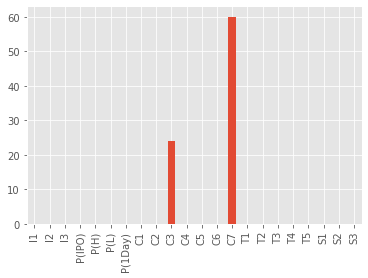

In [127]:
# Checking ratio of null values in the columns 
reset_df.isna().sum().plot(kind='bar')


# Imputation

Before we begin the imputation process, we will create a list of continuous columns that we will `fillna()` with the `fillna_median` function that we have created below

In [128]:
cont_cols = ['S1','S2','S3','T1','T2','T3','T4','T5','P(IPO)','P(H)','P(L)',\
       'P(1Day)','C1','C3','C4','C5','C6','C7']

In [129]:
## Creating a function to fill null values in the continuous column with the MEDIAN
def fillna_median(df, columns):
    for col in columns:
        median = df[col].median()
        df[col].fillna(median, inplace=True)
    return df

In [130]:
## Filling the null values
df = fillna_median(df, cont_cols)

Since `I3` is a text column, we will `fillna()` the column with the `mode`

In [131]:
## Filling the I3 Null Values with the MODE
df['I3'] = df['I3'].fillna(df['I3'].mode()[0])

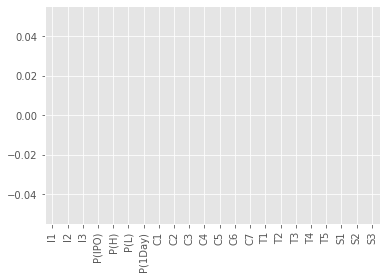

In [132]:
df.isna().sum().plot(kind='bar')

The imputation process is successful as there is no more null values in the `df`. Now we will continue on the feature engineering section for both control and target variables.

# Feature Engineering

In [133]:
# Avg stock price between the higher and lower bounds
df['P(mid)'] = (df['P(H)']+df['P(L)'])/2
df.dtypes

I1          object
I2          object
I3          object
P(IPO)     float64
P(H)       float64
P(L)       float64
P(1Day)    float64
C1         float64
C2         float64
C3         float64
C4         float64
C5         float64
C6         float64
C7         float64
T1         float64
T2         float64
T3         float64
T4         float64
T5         float64
S1         float64
S2         float64
S3         float64
P(mid)     float64
dtype: object

In [134]:
# T4^ is the ratio of total sentences which are long
df['T4^'] = df['T4']/df['T1']
df['T4^']

0      0.640426
1      0.644753
2      0.636816
3      0.539634
4      0.587413
         ...   
677    0.612663
678    0.647177
679    0.647761
680    0.710938
681    0.670702
Name: T4^, Length: 660, dtype: float64

In [135]:
#Ratio number of real words (T3) against all words (T1)
df['T3^'] = df['T3']/df['T2']
df['T3^']

0      0.908876
1      0.898724
2      0.909350
3      0.917060
4      0.888469
         ...   
677    0.920952
678    0.906227
679    0.889600
680    0.909412
681    0.904288
Name: T3^, Length: 660, dtype: float64

In [136]:
#Ratio of long words against all words
df['T5^'] = df['T5']/df['T2']
df['T5^']

0      0.054250
1      0.051395
2      0.061764
3      0.061630
4      0.048550
         ...   
677    0.050603
678    0.056770
679    0.047976
680    0.043178
681    0.054545
Name: T5^, Length: 660, dtype: float64

In [137]:
#Percentage of positive words
df['S1^'] = df['S1']/df['T2']
df['S1^']

0      0.004875
1      0.003258
2      0.011593
3      0.009686
4      0.004518
         ...   
677    0.006512
678    0.005069
679    0.004191
680    0.006773
681    0.008062
Name: S1^, Length: 660, dtype: float64

In [138]:
#Percentage of negative words
df['S2^'] = df['S2']/df['T2']
df['S2^']

0      0.009199
1      0.011105
2      0.006271
3      0.007144
4      0.010047
         ...   
677    0.007935
678    0.009124
679    0.009044
680    0.005362
681    0.008834
Name: S2^, Length: 660, dtype: float64

In [139]:
#Percentage of uncertain words
df['S3^'] = df['S3']/df['T2']
df['S3^']

0      0.010929
1      0.010876
2      0.011403
3      0.013319
4      0.011261
         ...   
677    0.012950
678    0.012527
679    0.009926
680    0.014110
681    0.013551
Name: S3^, Length: 660, dtype: float64

In [140]:
df.iloc[:, -10:].head()

,S1,S2,S3,P(mid),T4^,T3^,T5^,S1^,S2^,S3^
0,62.0,117.0,139.0,9.0,0.640426,0.908876,0.054250,0.004875,0.009199,0.010929
1,71.0,242.0,237.0,9.0,0.644753,0.898724,0.051395,0.003258,0.011105,0.010876
2,61.0,33.0,60.0,13.0,0.636816,0.909350,0.061764,0.011593,0.006271,0.011403
3,80.0,59.0,110.0,15.0,0.539634,0.917060,0.061630,0.009686,0.007144,0.013319
4,67.0,149.0,167.0,20.0,0.587413,0.888469,0.048550,0.004518,0.010047,0.011261


## Target Variables: Y1 & Y2

In [141]:
## Creating the Y1 target columns

#Y1 is the Pre-IPO Price Revision
df['Y1'] = np.where(df['P(IPO)']<df['P(mid)'], 1,0)
df['Y1'] = df['Y1'].astype('category')
df['Y1'].dtypes

CategoricalDtype(categories=[0, 1], ordered=False)

In [142]:
## Creating the Y2 target columns

#Y2 is the Post-IPO Initial Return
df['Y2'] = np.where(df['P(IPO)']<df['P(1Day)'], 1,0)
df['Y2'] = df['Y2'].astype('category')
df['Y2'].dtypes

CategoricalDtype(categories=[0, 1], ordered=False)

## Control Variables: C3^, C5^, C6^

In [143]:
#Positive EPS Dummy
#Dummy variable set to 1 if C3 is positive at the time of the IPO, otherwise 0
df['C3^'] = np.where(df['C3'] > 0, 1, 0)

df['C3^'].head() 

0    1
1    0
2    0
3    0
4    1
Name: C3^, dtype: int64

In [144]:
#Share Overhang
df['C5^'] =  df['C5']/df['C6']
df['C5^'].dtypes

dtype('float64')

In [145]:
#Up Revision
#Set to (P(IPO) – P(mid))/P(mid) x 100%, if P(IPO) > P(mid), otherwise 0
df['C6^'] = np.where(df['P(IPO)'] > df['P(mid)'], (df['P(IPO)'] - df['P(mid)'])/df['P(mid)'] * 100, 0)

df['C6^'] 

0      11.111111
1       0.000000
2       0.000000
3       0.000000
4       5.000000
         ...    
677    20.000000
678     0.000000
679     0.000000
680    18.750000
681     6.666667
Name: C6^, Length: 660, dtype: float64

In [146]:
df.dtypes

I1           object
I2           object
I3           object
P(IPO)      float64
P(H)        float64
P(L)        float64
P(1Day)     float64
C1          float64
C2          float64
C3          float64
C4          float64
C5          float64
C6          float64
C7          float64
T1          float64
T2          float64
T3          float64
T4          float64
T5          float64
S1          float64
S2          float64
S3          float64
P(mid)      float64
T4^         float64
T3^         float64
T5^         float64
S1^         float64
S2^         float64
S3^         float64
Y1         category
Y2         category
C3^           int64
C5^         float64
C6^         float64
dtype: object

## Extra Features

In [147]:
# Splitting companies to Tech vs. Non-Tech
def categorize_sic_code(sic_code):
    if str(sic_code).startswith("37") or str(sic_code).startswith("73"):
        return "Tech"
    else:
        return "Non-Tech"

In [148]:
# Categorize Companies if Tech or Non-Tech
df['I3_type'] = df['I3'].apply(categorize_sic_code)
df[['I3','I3_type']].sample(10)

,I3,I3_type
30,2000,Non-Tech
227,1221,Non-Tech
36,3576,Non-Tech
528,3663,Non-Tech
651,7375,Tech
403,7319,Tech
671,3841,Non-Tech
219,7372,Tech
76,8351,Non-Tech
338,2821,Non-Tech


In [149]:

df['I3^'] = np.where(df['I3_type']=='Tech', 1, 0)
df['I3^'] = df['I3^'].astype('category')

We assume that `P(H)` should be higher than `P(L)` so we decided to go through each observation and whenever the `P(L)` is higher than `P(H)`, we will switch the price in the below function. 

In [150]:
# To check if P(H) > P(L), if not then switch the price
def switch_prices(high_price, low_price):
    if high_price < low_price:
        temp = high_price
        high_price = low_price
        low_price = temp
    return (high_price, low_price)

In [151]:
df[['P(H)', 'P(L)']] = df.apply(lambda x: switch_prices(x['P(H)'], x['P(L)']), axis=1, result_type="expand")


In [152]:
def categorize_industry(sic_code):
  if sic_code in manuf_codes:
    return "Manufacturing"
  elif sic_code in serv_codes:
    return "Service"
  elif sic_code in other_codes:
    return "Other"
  else:
    return "Other"

df['Industry'] = df['I3'].apply(categorize_industry)

In [153]:
industry_dummy = pd.get_dummies(df['Industry'])
industry_dummy

,Manufacturing,Other,Service
0,1,0,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
...,...,...,...
677,0,0,1
678,0,0,1
679,1,0,0
680,0,0,1


## Isolating Continuous and Categorical Features

In [154]:
cat_cols = ['I1','I2','I3','C2','Y1','Y2','C3^','I3^']

In [155]:
cat_df = df[cat_cols]
cat_df.dtypes

I1       object
I2       object
I3       object
C2      float64
Y1     category
Y2     category
C3^       int64
I3^    category
dtype: object

In [156]:
cont_cols = ['P(IPO)','P(H)','P(L)','P(1Day)','P(mid)','C1','C3','C4','C5','C6','C7','T3^','T4^','T5^','S1^','S2^','S3^', 'C5^','C6^']

cont_df = df[cont_cols]
cont_df.dtypes

P(IPO)     float64
P(H)       float64
P(L)       float64
P(1Day)    float64
P(mid)     float64
C1         float64
C3         float64
C4         float64
C5         float64
C6         float64
C7         float64
T3^        float64
T4^        float64
T5^        float64
S1^        float64
S2^        float64
S3^        float64
C5^        float64
C6^        float64
dtype: object

In [157]:
cont_df.describe()

,P(IPO),P(H),P(L),P(1Day),P(mid),C1,C3,C4,C5,C6,C7,T3^,T4^,T5^,S1^,S2^,S3^,C5^,C6^
count,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,6.600000e+02,6.600000e+02,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000
mean,14.034621,15.634636,13.611152,25.934766,14.622894,149.728788,0.066724,0.007282,4.996285e+07,1.258248e+07,470.631368,inf,0.626720,inf,inf,inf,inf,4.417255,5.404645
std,5.954214,6.576552,5.824075,73.234948,6.187137,152.817467,158.390378,0.033318,1.055377e+08,2.539940e+07,1587.801852,NaN,0.077686,NaN,NaN,NaN,NaN,5.133537,10.877569
min,5.000000,6.000000,0.000000,0.000000,4.000000,10.000000,-786.239000,-0.162352,3.693227e+06,8.000000e+05,0.074000,0.000000,0.000000,-0.000089,-0.000093,0.002152,0.005326,0.283223,0.000000
25%,10.000000,13.000000,11.000000,11.000000,12.000000,85.000000,-0.795000,-0.013927,1.877568e+07,5.124546e+06,41.458000,0.883417,0.580329,0.047544,0.004131,0.006966,0.009579,2.850622,0.000000
50%,13.750000,15.500000,13.000000,14.845000,14.250000,107.000000,0.000000,0.009125,2.745438e+07,7.500000e+06,107.462000,0.897294,0.628861,0.051927,0.005027,0.008577,0.011301,3.731035,0.000000
75%,17.000000,17.000000,15.000000,20.485000,16.000000,155.250000,0.402500,0.031571,5.003986e+07,1.200000e+07,300.764000,0.909693,0.674461,0.056489,0.006256,0.010521,0.012848,4.857904,7.692308
max,85.000000,135.000000,108.000000,1159.200562,121.500000,2087.000000,3864.500000,0.092896,2.138085e+09,4.212336e+08,30683.000000,inf,0.826347,inf,inf,inf,inf,99.787255,100.000000


# Outlier Handling with IQR

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))
/usr/local/lib/python3.8/dist-packages/numpy/core/_methods.py:179: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/usr/local/lib/python3.8/dist-packages/numpy/lib/function_base.py:4486: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


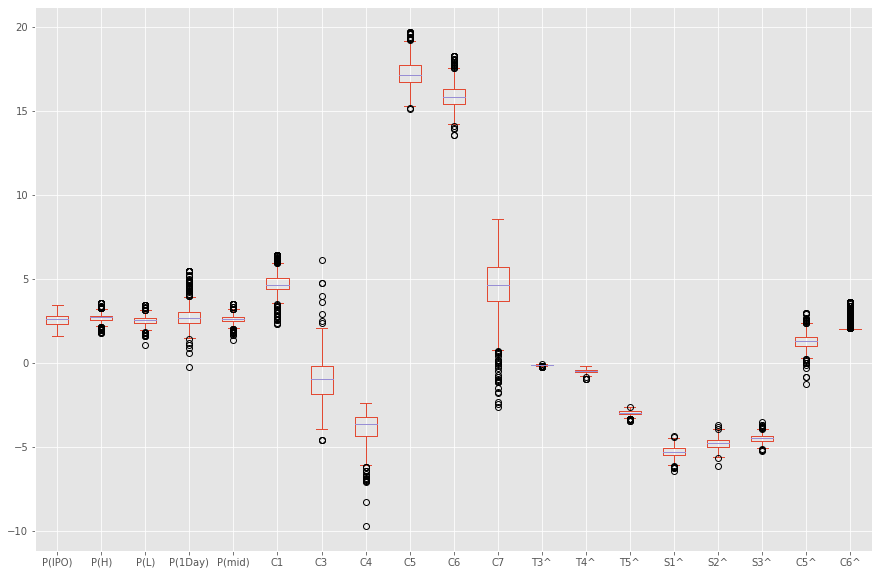

In [212]:
np.log(cont_df).plot(kind='box', figsize=(15,10))

In [159]:
cont_df.describe()

,P(IPO),P(H),P(L),P(1Day),P(mid),C1,C3,C4,C5,C6,C7,T3^,T4^,T5^,S1^,S2^,S3^,C5^,C6^
count,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,6.600000e+02,6.600000e+02,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000
mean,14.034621,15.634636,13.611152,25.934766,14.622894,149.728788,0.066724,0.007282,4.996285e+07,1.258248e+07,470.631368,inf,0.626720,inf,inf,inf,inf,4.417255,5.404645
std,5.954214,6.576552,5.824075,73.234948,6.187137,152.817467,158.390378,0.033318,1.055377e+08,2.539940e+07,1587.801852,NaN,0.077686,NaN,NaN,NaN,NaN,5.133537,10.877569
min,5.000000,6.000000,0.000000,0.000000,4.000000,10.000000,-786.239000,-0.162352,3.693227e+06,8.000000e+05,0.074000,0.000000,0.000000,-0.000089,-0.000093,0.002152,0.005326,0.283223,0.000000
25%,10.000000,13.000000,11.000000,11.000000,12.000000,85.000000,-0.795000,-0.013927,1.877568e+07,5.124546e+06,41.458000,0.883417,0.580329,0.047544,0.004131,0.006966,0.009579,2.850622,0.000000
50%,13.750000,15.500000,13.000000,14.845000,14.250000,107.000000,0.000000,0.009125,2.745438e+07,7.500000e+06,107.462000,0.897294,0.628861,0.051927,0.005027,0.008577,0.011301,3.731035,0.000000
75%,17.000000,17.000000,15.000000,20.485000,16.000000,155.250000,0.402500,0.031571,5.003986e+07,1.200000e+07,300.764000,0.909693,0.674461,0.056489,0.006256,0.010521,0.012848,4.857904,7.692308
max,85.000000,135.000000,108.000000,1159.200562,121.500000,2087.000000,3864.500000,0.092896,2.138085e+09,4.212336e+08,30683.000000,inf,0.826347,inf,inf,inf,inf,99.787255,100.000000


In [160]:
def outlier_replace(col):
  '''
  # This function takes a series (column)
  and replaces detected outliers with the 
  lower and uper bounds of the data.
  ---
  Input:
  col(float or int): A column of choice either 
  int or float.
  ---
  Output:
  The column with the outlier values replaced
  with lower and upper bound values of the date
  '''
  q1 = np.quantile(col, .25) #1st quantile
  q3 = np.quantile(col, .75) #3rd quantile

  iqr = q3 - q1 #The interquartile range. The middle 50% of the observations

  bound_lower = q1 - 1.5 * iqr #lower bounds
  bound_upper = q3 + 1.5 * iqr #upper bounds

  #replace values below the lower bounds with the lower bound value
  col = np.where(col < bound_lower, bound_lower, col) 

  #replace values above the upper bounds with the upper bound value
  col = np.where(col > bound_upper, bound_upper, col)



  return  col

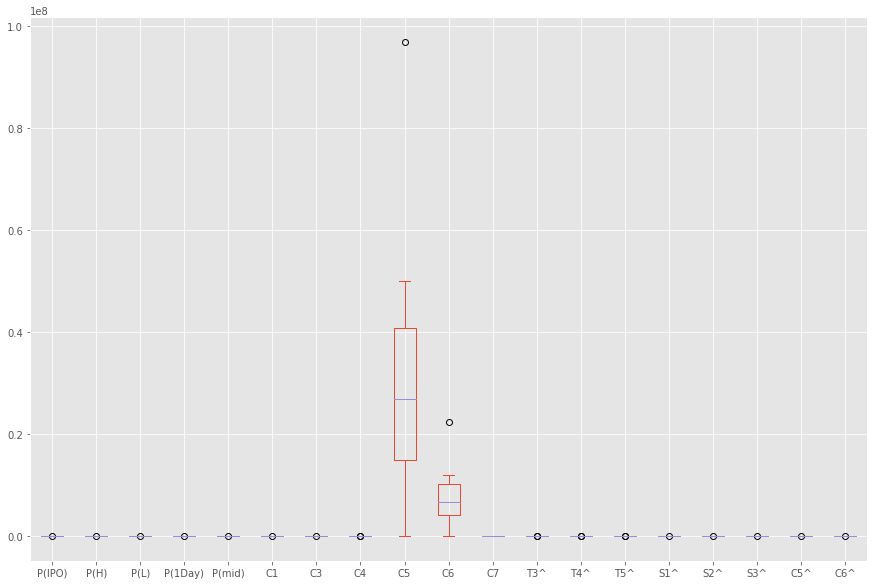

In [214]:
new_cont_df = pd.DataFrame()

for c in list(cont_df.columns):
  new_cont_df[c] = outlier_replace(cont_df[c])



new_cont_df.describe().plot(kind='box', figsize=(15,10))

plt.style.use('ggplot')


In [162]:
new_cont_df.describe()

,P(IPO),P(H),P(L),P(1Day),P(mid),C1,C3,C4,C5,C6,C7,T3^,T4^,T5^,S1^,S2^,S3^,C5^,C6^
count,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,6.600000e+02,6.600000e+02,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000
mean,13.798258,15.202061,13.244485,16.562874,14.219864,126.911932,-0.258577,0.007433,3.776132e+07,9.562688e+06,210.797297,0.894481,0.628160,0.052163,0.005287,0.008977,0.011425,4.009806,4.363858
std,4.692637,3.713070,3.645573,8.078217,3.681482,64.094744,1.239799,0.032757,2.642445e+07,5.990139e+06,232.171513,0.021956,0.069922,0.006823,0.001671,0.002749,0.002524,1.647987,6.431440
min,5.000000,7.000000,5.000000,0.000000,6.000000,10.000000,-2.591250,-0.082174,3.693227e+06,8.000000e+05,0.074000,0.844003,0.439132,0.034126,0.000943,0.002152,0.005326,0.283223,0.000000
25%,10.000000,13.000000,11.000000,11.000000,12.000000,85.000000,-0.795000,-0.013927,1.877568e+07,5.124546e+06,41.458000,0.883417,0.580329,0.047544,0.004131,0.006966,0.009579,2.850622,0.000000
50%,13.750000,15.500000,13.000000,14.845000,14.250000,107.000000,0.000000,0.009125,2.745438e+07,7.500000e+06,107.462000,0.897294,0.628861,0.051927,0.005027,0.008577,0.011301,3.731035,0.000000
75%,17.000000,17.000000,15.000000,20.485000,16.000000,155.250000,0.402500,0.031571,5.003986e+07,1.200000e+07,300.764000,0.909693,0.674461,0.056489,0.006256,0.010521,0.012848,4.857904,7.692308
max,27.500000,23.000000,21.000000,34.712499,22.000000,260.625000,2.198750,0.092896,9.693614e+07,2.231318e+07,689.723000,0.949107,0.815658,0.069908,0.009445,0.015854,0.017752,7.868826,19.230769


In [163]:
## Handling outliers with x_bar +/- 3*StD
def handle_outliers(df):
    for col in df.columns:
        mean = df[col].mean()
        std = df[col].std()
        lower_bound = mean - 3 * std
        upper_bound = mean + 3 * std
        df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])
        df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
    return df


In [164]:
handle_df = handle_outliers(cont_df)

<ipython-input-163-6d8af4db2315>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])
<ipython-input-163-6d8af4db2315>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])


In [165]:
handle_df.describe()

,P(IPO),P(H),P(L),P(1Day),P(mid),C1,C3,C4,C5,C6,C7,T3^,T4^,T5^,S1^,S2^,S3^,C5^,C6^
count,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,6.600000e+02,6.600000e+02,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000
mean,13.863679,15.424864,13.427187,22.301700,14.425606,143.591997,-4.208112,0.007388,4.574996e+07,1.152973e+07,400.728884,inf,0.627913,inf,inf,inf,inf,4.190883,4.927596
std,4.906149,4.407376,4.231953,32.332636,4.309973,112.256080,41.044102,0.032886,5.490622e+07,1.267723e+07,859.046278,NaN,0.070756,NaN,NaN,NaN,NaN,2.306365,8.126441
min,5.000000,6.000000,0.000000,0.000000,4.000000,10.000000,-475.104410,-0.092671,3.693227e+06,8.000000e+05,0.074000,0.000000,0.393663,-0.000089,-0.000093,0.002152,0.005326,0.283223,0.000000
25%,10.000000,13.000000,11.000000,11.000000,12.000000,85.000000,-0.795000,-0.013927,1.877568e+07,5.124546e+06,41.458000,0.883417,0.580329,0.047544,0.004131,0.006966,0.009579,2.850622,0.000000
50%,13.750000,15.500000,13.000000,14.845000,14.250000,107.000000,0.000000,0.009125,2.745438e+07,7.500000e+06,107.462000,0.897294,0.628861,0.051927,0.005027,0.008577,0.011301,3.731035,0.000000
75%,17.000000,17.000000,15.000000,20.485000,16.000000,155.250000,0.402500,0.031571,5.003986e+07,1.200000e+07,300.764000,0.909693,0.674461,0.056489,0.006256,0.010521,0.012848,4.857904,7.692308
max,31.897263,35.364292,31.083376,245.639610,33.184305,608.181189,475.237858,0.092896,3.665759e+08,8.878067e+07,5234.036924,inf,0.826347,inf,inf,inf,inf,19.817865,38.037351


# Scaling

## MinMax Scaling

In [166]:
minmaxscaler = preprocessing.MinMaxScaler()

#The code below chnages the Saclaed data into numpy arrays
scaled_data = minmaxscaler.fit_transform(new_cont_df)

# Scaled data into data frame and reassigning columns
scaled_df = pd.DataFrame(scaled_data, columns=cont_cols)

scaled_df.head()

,P(IPO),P(H),P(L),P(1Day),P(mid),C1,C3,C4,C5,C6,C7,T3^,T4^,T5^,S1^,S2^,S3^,C5^,C6^
0,0.222222,0.15625,0.21875,0.341952,0.1875,0.446883,1.000000,0.635450,0.399696,0.455535,0.074344,0.617232,0.534607,0.562403,0.462472,0.514293,0.450884,0.472094,0.577778
1,0.133333,0.18750,0.18750,0.208858,0.1875,0.993516,0.202766,0.393113,0.270004,0.074373,0.037500,0.520640,0.546102,0.482627,0.272332,0.653417,0.446620,1.000000,0.000000
2,0.088889,0.43750,0.43750,0.193014,0.4375,0.319202,0.282098,0.587702,0.141056,0.195229,0.010591,0.621738,0.525021,0.772399,1.000000,0.300628,0.489029,0.406811,0.000000
3,0.288889,0.56250,0.56250,0.356932,0.5625,0.794015,0.350992,0.583750,0.119638,0.171988,0.012256,0.695095,0.266919,0.768658,1.000000,0.364297,0.643249,0.397658,0.000000
4,0.711111,0.87500,0.87500,1.000000,0.8750,0.279302,0.555585,0.270058,0.290086,0.346299,0.916733,0.423070,0.393812,0.403124,0.420513,0.576213,0.477637,0.453892,0.260000


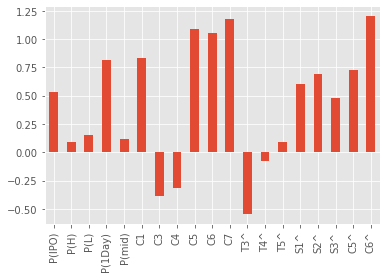

In [208]:
scaled_df.skew().plot(kind='bar')

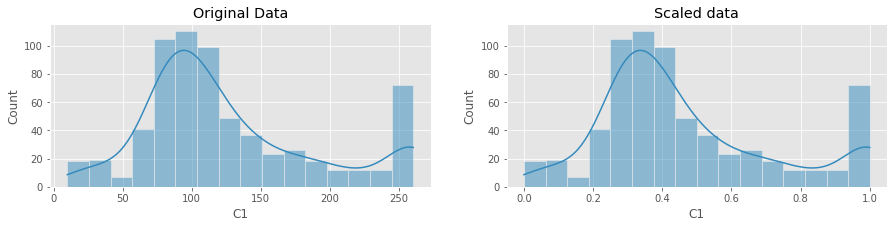

In [168]:
# plot both together to compare
# Using 'C1' as example
fig, ax = plt.subplots(1, 2, figsize=(15, 3))
sns.histplot(new_cont_df['C1'], ax=ax[0], kde=True, legend=False)
ax[0].set_title("Original Data")
sns.histplot(scaled_df['C1'], ax=ax[1], kde=True, legend=False)
ax[1].set_title("Scaled data")
plt.show()

All columns' values are on the same scale between 0 and 1

# Normalization

In [169]:
scaled_df['C1'].describe()

count    660.000000
mean       0.466482
std        0.255740
min        0.000000
25%        0.299252
50%        0.387032
75%        0.579551
max        1.000000
Name: C1, dtype: float64

In [170]:
scaled_df[scaled_df['C1'] <= 0 ]

,P(IPO),P(H),P(L),P(1Day),P(mid),C1,C3,C4,C5,C6,C7,T3^,T4^,T5^,S1^,S2^,S3^,C5^,C6^
557,0.311111,0.62500,0.62500,0.316889,0.62500,0.0,0.540971,0.496050,0.133198,0.520611,0.155714,0.965507,0.672399,0.346343,0.115641,0.372730,0.346351,0.139676,0.000000
571,0.644444,0.78125,0.78125,0.576449,0.78125,0.0,0.877088,0.744824,0.094450,0.427645,0.221880,0.883205,0.259586,0.559471,0.237867,0.350994,0.774865,0.127449,0.281081


## Power Transformer

In [171]:
from sklearn.preprocessing import PowerTransformer

In [172]:
pt = PowerTransformer()

In [173]:
print(pt.fit(scaled_df))

PowerTransformer()


In [174]:
print(pt.lambdas_)

[-0.2966598   0.73465707  0.58850298 -1.19460391  0.67173932 -1.19085039
  1.75411079  1.89491613 -2.49595377 -2.27090575 -3.02914787  2.30586627
  1.1866334   0.77516677 -0.74014502 -1.10845041 -0.28653487 -0.93727306
 -3.86605347]


In [175]:
normal_df = pt.transform(scaled_df)

In [176]:
normal_df

array([[-0.79385237, -1.5666488 , -1.32639496, ..., -0.11544487,
         0.04634314,  1.35377162],
       [-1.32935289, -1.42273884, -1.47700001, ..., -0.13744401,
         1.95862095, -0.76965221],
       [-1.61797001, -0.30500604, -0.31353017, ...,  0.07773208,
        -0.28631528, -0.76965221],
       ...,
       [-1.32935289, -1.85761297, -1.62924503, ..., -0.54640792,
        -0.07838345, -0.76965221],
       [ 1.11057949,  0.4994559 ,  0.50501604, ...,  1.07111092,
         0.26674516,  1.60888287],
       [ 0.55046733,  0.23418336,  0.23670971, ...,  0.87964413,
        -0.37766896,  0.98239445]])

In [177]:
normal_df = pd.DataFrame(normal_df, columns=cont_cols)

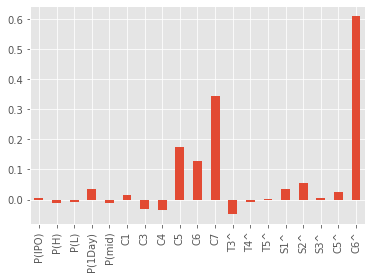

In [211]:
#Skewness was further reduced

normal_df.skew().plot(kind='bar')

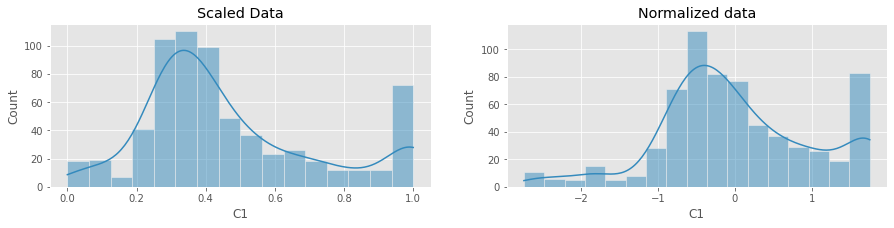

In [179]:
fig, ax = plt.subplots(1, 2, figsize=(15, 3))
sns.histplot(scaled_df['C1'], ax=ax[0], kde=True, legend=False)
ax[0].set_title("Scaled Data")
sns.histplot(normal_df['C1'], ax=ax[1], kde=True, legend=False)
ax[1].set_title("Normalized data")
plt.show()

Significant improvement when the data is normalized. We now see a more even Gaussian distribution.

# Handle Outliers with StD

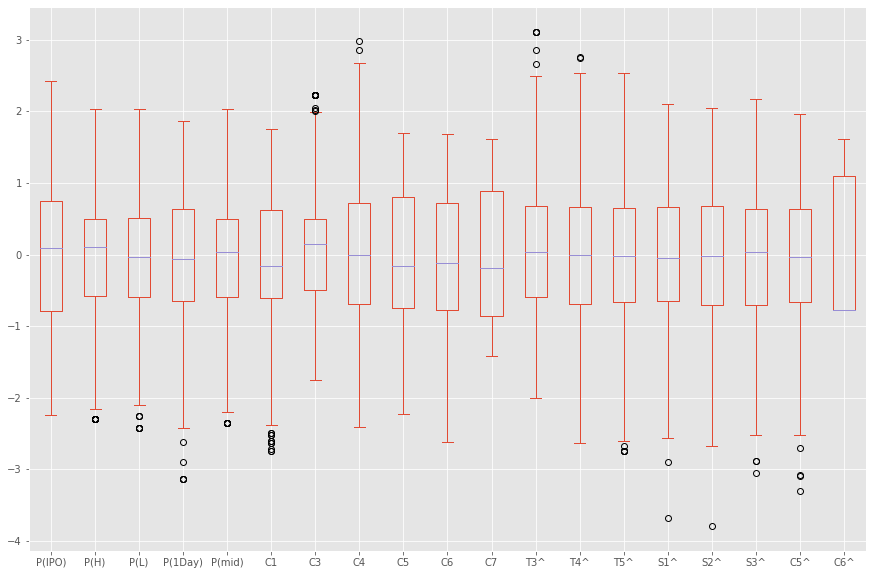

In [180]:
# Before Outlier Handling

normal_df.plot(kind='box', figsize=(15,10))

In [181]:
def handle_outliers(df):
    for col in df.columns:
        mean = df[col].mean()
        std = df[col].std()
        lower_bound = mean - 3 * std
        upper_bound = mean + 3 * std
        df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])
        df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
    return df

In [182]:
check_df = pd.DataFrame(normal_df, columns = cont_cols)
check_df

,P(IPO),P(H),P(L),P(1Day),P(mid),C1,C3,C4,C5,C6,C7,T3^,T4^,T5^,S1^,S2^,S3^,C5^,C6^
0,-0.793852,-1.566649,-1.326395,-0.507226,-1.446354,0.104438,2.223427,0.639711,0.481063,0.495955,-0.744522,0.629049,0.164585,0.318762,-0.147366,0.221154,-0.115445,0.046343,1.353772
1,-1.329353,-1.422739,-1.477000,-1.336932,-1.446354,1.741249,-1.111800,-0.678523,-0.085902,-1.798602,-1.054544,0.109829,0.226936,-0.098307,-1.326718,0.859034,-0.137444,1.958621,-0.769652
2,-1.617970,-0.305006,-0.313530,-1.449296,-0.308600,-0.495540,-0.837205,0.365064,-0.891914,-0.808322,-1.310627,0.654291,0.112649,1.394571,2.098700,-1.040721,0.077732,-0.286315,-0.769652
3,-0.424318,0.234183,0.236710,-0.424976,0.235590,1.269998,-0.588087,0.342659,-1.058373,-0.973199,-1.293984,1.078223,-1.261629,1.375668,2.098700,-0.621075,0.798390,-0.335364,-0.769652
4,1.451842,1.534811,1.538195,1.859991,1.537225,-0.710071,0.208848,-1.275185,0.015137,0.047979,1.554660,-0.372681,-0.591915,-0.519002,-0.383916,0.519714,0.020713,-0.043500,0.744547
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
655,0.930719,0.234183,0.236710,1.359339,0.235590,1.754843,-0.159422,-0.141655,0.375783,0.334774,0.359969,1.301561,-0.233285,-0.214971,0.803208,-0.274724,0.666657,0.109780,1.617642
656,-0.078773,0.234183,0.236710,0.028093,0.235590,-0.333884,-0.192061,1.671070,0.117963,-0.242780,-1.060767,0.489533,0.261895,0.683116,-0.023495,0.193510,0.511675,0.535934,-0.769652
657,-1.329353,-1.857613,-1.629245,-1.282946,-1.742697,-0.070256,0.674698,0.684783,-1.365806,-1.486628,-0.698582,-0.321540,0.270318,-0.604538,-0.611582,0.163781,-0.546408,-0.078383,-0.769652
658,1.110579,0.499456,0.505016,-0.417952,0.502297,-0.754750,0.320876,0.747111,-1.206222,-1.486628,-0.107031,0.657578,1.190912,-1.328561,0.936852,-1.526952,1.071111,0.266745,1.608883


In [183]:
new_normal_df = handle_outliers(check_df)

In [184]:
new_normal_df.describe()

,P(IPO),P(H),P(L),P(1Day),P(mid),C1,C3,C4,C5,C6,C7,T3^,T4^,T5^,S1^,S2^,S3^,C5^,C6^
count,6.600000e+02,6.600000e+02,6.600000e+02,660.000000,6.600000e+02,6.600000e+02,6.600000e+02,6.600000e+02,6.600000e+02,6.600000e+02,6.600000e+02,660.000000,6.600000e+02,6.600000e+02,660.000000,660.000000,660.000000,660.000000,6.600000e+02
mean,1.399554e-16,2.287732e-16,-1.345725e-16,0.000809,1.884015e-16,2.691450e-18,-1.372639e-16,-4.037175e-17,-2.153160e-17,-2.112788e-16,-5.382900e-17,-0.000639,-1.453383e-16,-2.826022e-16,0.001021,0.001196,0.000072,0.000710,-5.652044e-17
std,1.000758e+00,1.000758e+00,1.000758e+00,0.998271,1.000758e+00,1.000758e+00,1.000758e+00,1.000758e+00,1.000758e+00,1.000758e+00,1.000758e+00,0.998804,1.000758e+00,1.000758e+00,0.997339,0.996683,1.000540,0.998545,1.000758e+00
min,-2.243864e+00,-2.302505e+00,-2.417430e+00,-3.002275,-2.352186e+00,-2.746324e+00,-1.752531e+00,-2.410021e+00,-2.232600e+00,-2.613503e+00,-1.419154e+00,-1.998487,-2.628480e+00,-2.744581e+00,-3.002275,-3.002275,-3.002275,-3.002275,-7.696522e-01
25%,-7.938524e-01,-5.792382e-01,-5.960205e-01,-0.649436,-5.864950e-01,-6.010015e-01,-4.989682e-01,-6.950993e-01,-7.410981e-01,-7.688695e-01,-8.600104e-01,-0.595147,-6.919480e-01,-6.690940e-01,-0.654643,-0.703362,-0.703212,-0.668260,-7.696522e-01
50%,8.556160e-02,1.004944e-01,-3.605090e-02,-0.062148,3.314098e-02,-1.617400e-01,1.491308e-01,-3.669911e-03,-1.660312e-01,-1.214115e-01,-1.928247e-01,0.040013,-1.593072e-03,-2.024035e-02,-0.050188,-0.014474,0.036760,-0.040362,-7.696522e-01
75%,7.441666e-01,4.994559e-01,5.050160e-01,0.638374,5.022965e-01,6.162124e-01,4.982848e-01,7.231441e-01,7.999818e-01,7.144924e-01,8.815132e-01,0.672623,6.572263e-01,6.426690e-01,0.667563,0.675876,0.629716,0.634444,1.095473e+00
max,2.419388e+00,2.038580e+00,2.033400e+00,1.859991,2.037538e+00,1.754843e+00,2.223427e+00,2.974727e+00,1.698196e+00,1.684038e+00,1.612851e+00,3.002275,2.753542e+00,2.528678e+00,2.098700,2.044505,2.175770,1.958621,1.617642e+00


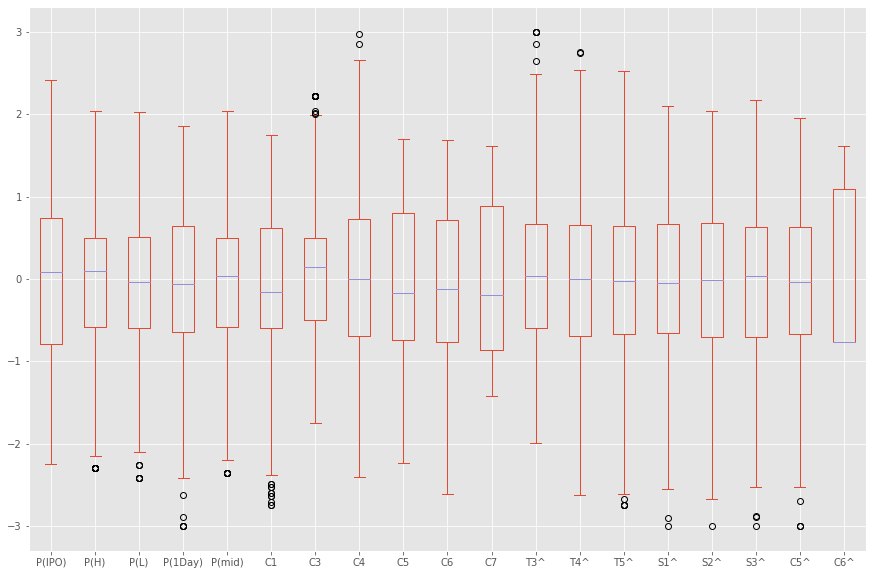

In [185]:
new_normal_df.plot(kind='box', figsize=(15,10))

In [186]:
# new_normal_df = pd.DataFrame()
# normal_df=pd.DataFrame()
# for c in list(cont_df.columns):
#   new_normal_df[c] = outlier_replace(normal_df[c])



# new_normal_df.describe().plot(kind='box')

In [187]:
# new_normal_df.describe()

# Scaling

## StandardScaler

In [188]:
from sklearn.preprocessing import StandardScaler
def scale_dataframe(df):
    scaler = StandardScaler()
    scaled_df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
    return scaled_df


In [189]:
new_scaled_df = scale_dataframe(new_normal_df)

In [190]:
new_scaled_df.sample(10)

,P(IPO),P(H),P(L),P(1Day),P(mid),C1,C3,C4,C5,C6,C7,T3^,T4^,T5^,S1^,S2^,S3^,C5^,C6^
48,0.930719,0.234183,0.236710,1.863815,0.235590,-0.495540,-0.093723,0.828476,0.059658,-0.428808,-0.483893,-0.133690,-0.124073,0.268162,-1.198289,-0.972919,0.136630,0.725987,1.617642
476,-0.793852,0.234183,0.236710,1.863815,0.235590,-0.622521,-1.492107,-0.944321,-0.226404,-0.973199,-1.413590,1.453792,-0.539948,1.974194,0.769892,0.634524,1.094861,1.147963,-0.769652
513,-1.922281,-0.579238,-0.596020,-1.601919,-0.586495,0.570373,-1.752531,-0.411876,-1.114826,-1.149128,-1.111495,0.203871,-0.003004,0.977244,1.785988,0.415782,0.754673,-0.162398,-0.769652
457,-0.306610,-0.579238,-0.596020,-0.340253,-0.586495,1.556451,-0.369048,1.197566,-0.722379,0.065923,-0.794727,-2.001758,0.760917,-1.254261,-0.176756,-0.536936,-0.830113,-1.135529,-0.769652
440,0.550467,0.234183,0.236710,0.319291,0.235590,1.139256,0.149131,-0.201065,0.798737,1.684038,-0.366893,-2.001758,-0.549650,-2.744581,-0.024278,-0.664135,-3.003003,-1.588912,0.982394
596,0.550467,0.499456,0.505016,0.137020,0.502297,1.481289,0.958295,1.019787,0.810342,1.684038,1.612851,-0.084288,0.029592,0.899561,0.469093,0.824722,-1.595110,-1.540952,-0.769652
75,1.613969,1.534811,1.538195,1.388513,1.537225,-0.433924,0.260371,0.039377,1.143910,0.409907,1.612851,-1.970040,1.792560,-0.998050,-0.957475,-1.921983,1.451616,1.308573,1.285560
373,0.139579,-0.033921,-0.036051,-0.172151,-0.034644,-0.516352,-1.752531,-1.562485,0.099708,-0.438852,-0.192825,0.359214,0.590951,1.755830,-1.250282,0.760665,0.961035,0.808046,-0.769652
294,-1.329353,-1.137891,-1.177371,-0.912164,-1.155090,0.236776,-1.752531,0.409817,-0.513652,-0.508250,-1.375512,0.439691,-0.056932,0.132209,0.152685,-0.644354,-0.256016,-0.091238,-0.769652
445,-1.471790,-1.422739,-1.477000,-0.939265,-1.446354,0.104438,-1.752531,-1.700015,0.065105,-0.729746,-0.626551,1.202222,-0.633177,-0.120996,-0.590268,0.339481,0.125939,1.225055,-0.769652


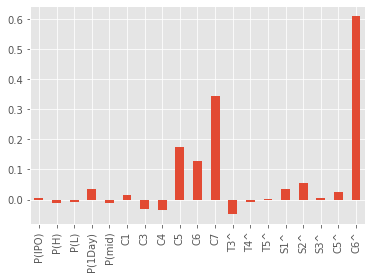

In [209]:
new_scaled_df.skew().plot(kind='bar')

We can see skewness was significantly further reduced after all transformations.

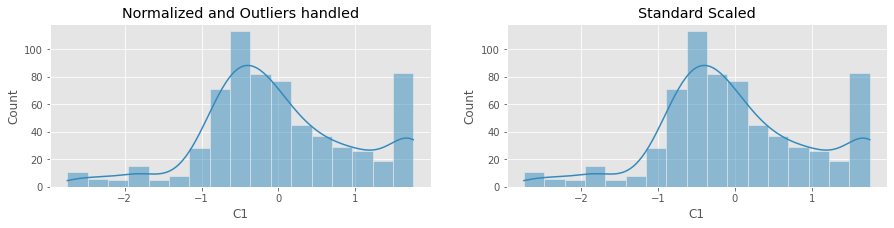

In [192]:
fig, ax = plt.subplots(1, 2, figsize=(15, 3))
sns.histplot(new_normal_df['C1'], ax=ax[0], kde=True, legend=False)
ax[0].set_title("Normalized and Outliers handled")
sns.histplot(new_scaled_df['C1'], ax=ax[1], kde=True, legend=False)
ax[1].set_title("Standard Scaled")
plt.show()

No chnage in shape of the data or range.

In [193]:
p1a_df = pd.concat([new_scaled_df,cat_df,industry_dummy], axis=1)
p1a_df

,P(IPO),P(H),P(L),P(1Day),P(mid),C1,C3,C4,C5,C6,...,I2,I3,C2,Y1,Y2,C3^,I3^,Manufacturing,Other,Service
0,-0.793852,-1.566649,-1.326395,-0.509301,-1.446354,0.104438,2.223427,0.639711,0.481063,0.495955,...,ADVANCED ANALOGIC TECHNOLOGIES INC,3674,1.0,0,1,1.0,0,1.0,0.0,0.0
1,-1.329353,-1.422739,-1.477000,-1.341074,-1.446354,1.741249,-1.111800,-0.678523,-0.085902,-1.798602,...,ACCENTIA BIOPHARMACEUTICALS INC,2834,0.0,1,0,0.0,0,0.0,1.0,0.0
2,-1.617970,-0.305006,-0.313530,-1.453718,-0.308600,-0.495540,-0.837205,0.365064,-0.891914,-0.808322,...,ACADIA PHARMACEUTICALS INC,2834,1.0,1,0,0.0,0,0.0,1.0,0.0
3,-0.424318,0.234183,0.236710,-0.426846,0.235590,1.269998,-0.588087,0.342659,-1.058373,-0.973199,...,ACHILLION PHARMACEUTICALS INC,2834,1.0,1,1,0.0,0,0.0,1.0,0.0
4,1.451842,1.534811,1.538195,1.863815,1.537225,-0.710071,0.208848,-1.275185,0.015137,0.047979,...,AMERICAN COMMERCIAL LINES INC.,4492,1.0,0,1,1.0,0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
677,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,ZIPCAR INC,7514,1.0,0,1,0.0,0,0.0,0.0,1.0
678,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Zeltiq Aesthetics Inc,3845,1.0,1,1,0.0,0,0.0,0.0,1.0
679,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"ZST Digital Networks, Inc.",3663,0.0,0,0,1.0,0,1.0,0.0,0.0
680,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Zumiez Inc,5600,1.0,0,0,1.0,0,0.0,0.0,1.0


In [194]:
p1a_df.isna().sum()

P(IPO)           21
P(H)             21
P(L)             21
P(1Day)          21
P(mid)           21
C1               21
C3               21
C4               21
C5               21
C6               21
C7               21
T3^              21
T4^              21
T5^              21
S1^              21
S2^              21
S3^              21
C5^              21
C6^              21
I1               21
I2               21
I3               21
C2               21
Y1               21
Y2               21
C3^              21
I3^              21
Manufacturing    21
Other            21
Service          21
dtype: int64

In [195]:
p1a_df = p1a_df.dropna(how='any')

p1a_df.isna().sum()

P(IPO)           0
P(H)             0
P(L)             0
P(1Day)          0
P(mid)           0
C1               0
C3               0
C4               0
C5               0
C6               0
C7               0
T3^              0
T4^              0
T5^              0
S1^              0
S2^              0
S3^              0
C5^              0
C6^              0
I1               0
I2               0
I3               0
C2               0
Y1               0
Y2               0
C3^              0
I3^              0
Manufacturing    0
Other            0
Service          0
dtype: int64

# Feature Selection

In [196]:
# Import the necessary libraries first
#### Correlation method - for classification chi2 only
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_classif
#### RFE method - replace the model with the model you plan to use
from sklearn.feature_selection import RFE
# from sklearn.linear_model import LogisticRegression
#### feature importance method
#### this method can be used for both topK and cut-off
from sklearn.linear_model import Ridge
#### specifically tree-based feature importance method
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
#### for voting
from collections import Counter
#### for ANOVA
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms

In [197]:
usable_cols = ['T3^','T4^','T5^','S1^','S2^','S3^','C1','C2','C3^','C5^','C6^','C7','I3^','Manufacturing','Service','Other','Y1','Y2']

In [198]:
features_df = p1a_df[usable_cols]
features_df

,T3^,T4^,T5^,S1^,S2^,S3^,C1,C2,C3^,C5^,C6^,C7,I3^,Manufacturing,Service,Other,Y1,Y2
0,0.630920,0.164585,0.318762,-0.148896,0.220857,-0.115542,0.104438,1.0,1.0,0.045735,1.353772,-0.744522,0,1.0,0.0,0.0,0,1
1,0.110684,0.226936,-0.098307,-1.332291,0.861346,-0.137546,1.741249,0.0,0.0,1.962251,-0.769652,-1.054544,0,0.0,0.0,1.0,1,0
2,0.656212,0.112649,1.394571,2.104870,-1.046178,0.077677,-0.495540,1.0,0.0,-0.287661,-0.769652,-1.310627,0,0.0,0.0,1.0,1,0
3,1.080973,-1.261629,1.375668,2.104870,-0.624815,0.798492,1.269998,1.0,0.0,-0.336819,-0.769652,-1.293984,0,0.0,0.0,1.0,1,1
4,-0.372770,-0.591915,-0.519002,-0.386257,0.520638,0.020646,-0.710071,1.0,1.0,-0.044307,0.744547,1.554660,0,0.0,0.0,1.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
655,1.304748,-0.233285,-0.214971,0.804937,-0.277048,0.666731,1.754843,1.0,0.0,0.109312,1.617642,0.359969,1,0.0,0.0,1.0,0,1
656,0.491131,0.261895,0.683116,-0.024601,0.193101,0.511715,-0.333884,1.0,1.0,0.536411,-0.769652,-1.060767,1,0.0,1.0,0.0,0,0
657,-0.321529,0.270318,-0.604538,-0.614704,0.163250,-0.546599,-0.070256,0.0,0.0,-0.079269,-0.769652,-0.698582,0,0.0,1.0,0.0,0,1
658,0.659505,1.190912,-1.328561,0.939039,-1.534396,1.071273,-0.754750,1.0,1.0,0.266625,1.608883,-0.107031,0,0.0,1.0,0.0,1,0


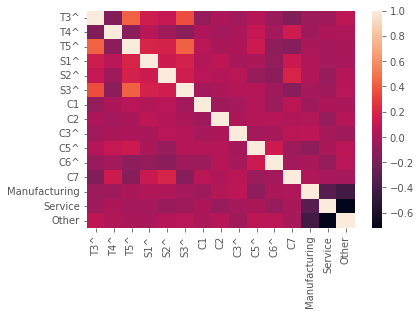

In [199]:
sns.heatmap(features_df.corr())

In [200]:
X = features_df.drop(columns=['Y1','Y2'])
y1 = features_df['Y1']
y2 = features_df['Y2']

In [201]:
X.head()

,T3^,T4^,T5^,S1^,S2^,S3^,C1,C2,C3^,C5^,C6^,C7,I3^,Manufacturing,Service,Other
0,0.630920,0.164585,0.318762,-0.148896,0.220857,-0.115542,0.104438,1.0,1.0,0.045735,1.353772,-0.744522,0,1.0,0.0,0.0
1,0.110684,0.226936,-0.098307,-1.332291,0.861346,-0.137546,1.741249,0.0,0.0,1.962251,-0.769652,-1.054544,0,0.0,0.0,1.0
2,0.656212,0.112649,1.394571,2.104870,-1.046178,0.077677,-0.495540,1.0,0.0,-0.287661,-0.769652,-1.310627,0,0.0,0.0,1.0
3,1.080973,-1.261629,1.375668,2.104870,-0.624815,0.798492,1.269998,1.0,0.0,-0.336819,-0.769652,-1.293984,0,0.0,0.0,1.0
4,-0.372770,-0.591915,-0.519002,-0.386257,0.520638,0.020646,-0.710071,1.0,1.0,-0.044307,0.744547,1.554660,0,0.0,0.0,1.0


In [202]:
y1.head()

0    0
1    1
2    1
3    1
4    0
Name: Y1, dtype: category
Categories (2, int64): [0, 1]

In [203]:
X.shape

(639, 16)

In [204]:
y1.shape

(639,)

In [205]:
def feature_selector(X, y, model, names, _method="topk", n=int(X.shape[1]/2), fit_X=False, thres = 0.1):
  """voting based feature selector
  - _method: "topk" for top-K method (default), "cutoff" for cut-off based method
  - n: number of features to be selected. only available for top-K method - default half of the total features
  - thres: cut-off threshold (default 0.1), only availabel for cutoff method
  - fit_X: fit_transform X or just return indices
  TODO: include support for regression problems
  """
  #### Placeholder for tests
  # X.shape[0] == y.shape[0]
  if names: # if given feature names
    feature_names = np.array(names)
  else: # otherwise use location
    feature_names = np.array(["X%s" % x for x in range(len(X.shape[0]))])
  if _method == 'topk':
    #### np.argpartition gets the indices of the largest n element from the array in ascending order
    #### [::-1] reverse the order
    ############################################################################
    #### IMPORTANT: 
    #### use `chi2` as the `score_func` when doing categorical features - values has to be non-negative
    #### use `f_classif` as the `score_func` when doing categorical and continuous feautures
    #### use `f_regression` as the `score_func` when doing continuous feautures
    ############################################################################
    corr_features = list(np.argpartition(SelectKBest(score_func=f_classif, k=n).fit(X,y).scores_, -n)[-n:][::-1])
    #### binary masking on features, use np.where() to get the indices of selected
    rfe_features = list(np.where(RFE(model, n_features_to_select=n, step=1).fit(X, y).support_)[0])
    #### argsort get sorted indices by values, ::-1] reverse the asceding order
    ridge_features = list(np.argsort(Ridge(alpha=1.0).fit(X, y).coef_)[-n:][::-1])
    #### using ExtraTree
    extratree_features = list(np.argsort(ExtraTreesClassifier().fit(X, y).feature_importances_)[-n:][::-1])
    ### using Random Forest:
    rf_features = list(np.argsort(RandomForestClassifier().fit(X, y).feature_importances_)[-n:][::-1])
    print("Using the Top-K method: ")
    print("Selected features by correlation: ", feature_names[corr_features])
    print("Selected features by RFE: ", feature_names[rfe_features])
    print("Selected features by Ridge coefficients: ", feature_names[ridge_features])
    print("Selected features by Extra Tree feature importance: ", feature_names[extratree_features])
    print("Selected features by Random Forest feature importance: ", feature_names[rf_features])

  elif _method == 'cutoff':
    corr_features, rfe_features = list(), list() #### N/A
    ridge_features = list(np.where(Ridge(alpha=1.0).fit(X, y).coef_ > thres)[0])
    extratree_features = list(np.where(ExtraTreesClassifier().fit(X, y).feature_importances_ > thres)[0])
    rf_features = list(np.where(RandomForestClassifier().fit(X, y).feature_importances_ > thres)[0])
    print("Using the Cutoff method: ")
    # print("Selected features by correlation: ", feature_names[corr_features])
    # print("Selected features by RFE: ", feature_names[rfe_features])
    print("Selected features by Ridge coefficients: ", feature_names[ridge_features])
    print("Selected features by Extra Tree feature importance: ", feature_names[extratree_features])
    print("Selected features by Random Forest feature importance: ", feature_names[rf_features])
  else:
    return("Only Top-K and Cutoff methods are currently supported!")

  ######################################
  #### combine results using voting ####
  ######################################
  counted = Counter(np.concatenate((corr_features, rfe_features, ridge_features, extratree_features, rf_features), axis=None)).most_common(n)

  #### list of tuples (feature_index, votes)
  counted.sort(key = lambda x: x[1], reverse=True)
  final_select_series = pd.Series({feature_names[f]:c for f,c in counted}).sort_values(ascending=False)
  selected_idx = sorted([f for f,c in counted])
  assert len(selected_idx) == n
  print(final_select_series)
  if fit_X:
    return(X[:,selected_idx])
  else:
    return(feature_names[selected_idx])





In [206]:
feature_selector(X, y2, model=RandomForestClassifier(), names = usable_cols, n=10)

Using the Top-K method: 
Selected features by correlation:  ['C2' 'I3^' 'Other' 'Service' 'C7' 'C6^' 'S1^' 'S2^' 'S3^' 'Manufacturing']
Selected features by RFE:  ['T3^' 'T4^' 'T5^' 'S1^' 'S2^' 'S3^' 'C1' 'C5^' 'C6^' 'C7']
Selected features by Ridge coefficients:  ['C2' 'I3^' 'Manufacturing' 'S2^' 'C3^' 'T4^' 'Service' 'T3^' 'C5^' 'C1']
Selected features by Extra Tree feature importance:  ['S2^' 'T5^' 'S3^' 'T4^' 'S1^' 'C5^' 'C7' 'T3^' 'C1' 'C6^']
Selected features by Random Forest feature importance:  ['T5^' 'C5^' 'S2^' 'S1^' 'T4^' 'S3^' 'C7' 'T3^' 'C1' 'C6^']
S2^    5
C7     4
C6^    4
S1^    4
S3^    4
T3^    4
T4^    4
C1     4
C5^    4
T5^    3
dtype: int64


array(['T3^', 'T4^', 'T5^', 'S1^', 'S2^', 'S3^', 'C1', 'C5^', 'C6^', 'C7'],
      dtype='<U13')

In [207]:
out_path = '/content/drive/MyDrive/Classroom/DATA 6545: Data Science and MLOps SP2023/P3BB_data.xlsx'
features_df.to_excel(out_path)